# Employee attrition project
## Problem Statement
This data analysis project looks at data from company X which is trying to control employee attrition. There are two datasets to analyze; 'Existing employees' and 'Employees who have left'.

## Procedures for handling the problem
**Step 1:** Importing all the modules and packages required for analyzing the data.

**Step 2:** Loading the data and Preparing it for analysis. This is where data manipulation will take place.

**Step 3:** Exploratory Data Analysis. Here, we shall basically try to investigate; **what type of employees are prone to leaving the company and why?** So, what are some of the factors that contribute to employees leaving the company?

**Step 4:** Can we predict future employees who are likely to leave the company?

### Importing all the modules and packages required for analyzing the data

In [1]:
# import data manipulation libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set style to whitegrid
sns.set_style('whitegrid')

# this is a magic command to allow plots to appear in this ipython notebook
%matplotlib inline

### Loading the data and Preparing it for analysis
We shall load the data which is in .xlsx format into the working environment and turn into a pandas dataframe. Since we have two separate datasets, we shall also combine this two datasets into one mega dataframe for analysis.

In [2]:
# load the .xlsx file
data = pd.ExcelFile('TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx')

In [3]:
# check all the sheets available in the excel file
data.sheet_names

['INFO', 'Existing employees', 'Employees who have left', 'Presentation']

In [4]:
# parse the 'Employees who have left' sheet into a pandas dataframe for all the employees who have left the company
employees_who_left = data.parse('Employees who have left')

In [5]:
# preview the 'Employees who have left' dataframe
employees_who_left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [6]:
# parse the 'Existing employees' sheet into a pandas dataframe for all the employees who are still in the company
existing_employees = data.parse('Existing employees')

In [7]:
# preview the 'Existing employees' dataframe
existing_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


Both dataframes have the following columns or attributes for each employee:

**satisfaction_level** - Satisfaction Level of the employee

**last_evaluation** - Last evaluation of the employee

**number_project** - Number of projects the employee has done

**average_montly_hours** - Average monthly hours the employee works

**time_spend_company** - Time (in years) spent at the company by the employee

**Work_accident** - Whether the employee has had a work accident

**promotion_last_5years** - Whether the employee has had a promotion in the last 5 years

**dept** - Department of the employee (column sales)

**salary** - Salary of the employee

However, we realize that we do not yet have the column indicating whether the employee has left the company or they are still existing in the company. Therefore, for both dataframes, we shall create a 'left/existing' column. For the 'Employees who have left' dataframe, we shall indicate 'left', meaning that the employee left the company. For the ''Existing employees'' dataframe, we shall indicate 'existing', meaning that the employee is still existing in the company. 

In [8]:
# create a column indicating whether the employee has left the company for the 'employees_who_left' dataframe
employees_who_left['left/existing'] = 'left'

In [9]:
# create a column indicating whether the employee still exists in the company for the 'existing_employees' dataframe
existing_employees['left/existing'] = 'existing'

In [10]:
# preview the 'employees_who_left' dataframe to have a look at the newly added column
employees_who_left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left/existing
0,1,0.38,0.53,2,157,3,0,0,sales,low,left
1,2,0.80,0.86,5,262,6,0,0,sales,medium,left
2,3,0.11,0.88,7,272,4,0,0,sales,medium,left
3,4,0.72,0.87,5,223,5,0,0,sales,low,left
4,5,0.37,0.52,2,159,3,0,0,sales,low,left


In [11]:
# preview the 'existing_employees' dataframe to have a look at the newly added column
existing_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left/existing
0,2001,0.58,0.74,4,215,3,0,0,sales,low,existing
1,2002,0.82,0.67,2,202,3,0,0,sales,low,existing
2,2003,0.45,0.69,5,193,3,0,0,sales,low,existing
3,2004,0.78,0.82,5,247,3,0,0,sales,low,existing
4,2005,0.49,0.60,3,214,2,0,0,sales,low,existing


In [12]:
# grab general information about the 'employees_who_left' dataframe
employees_who_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 3571 non-null   int64  
 1   satisfaction_level     3571 non-null   float64
 2   last_evaluation        3571 non-null   float64
 3   number_project         3571 non-null   int64  
 4   average_montly_hours   3571 non-null   int64  
 5   time_spend_company     3571 non-null   int64  
 6   Work_accident          3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   dept                   3571 non-null   object 
 9   salary                 3571 non-null   object 
 10  left/existing          3571 non-null   object 
dtypes: float64(2), int64(6), object(3)
memory usage: 307.0+ KB


In [13]:
# grab general information about the 'existing_employees' dataframe
existing_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 11428 non-null  int64  
 1   satisfaction_level     11428 non-null  float64
 2   last_evaluation        11428 non-null  float64
 3   number_project         11428 non-null  int64  
 4   average_montly_hours   11428 non-null  int64  
 5   time_spend_company     11428 non-null  int64  
 6   Work_accident          11428 non-null  int64  
 7   promotion_last_5years  11428 non-null  int64  
 8   dept                   11428 non-null  object 
 9   salary                 11428 non-null  object 
 10  left/existing          11428 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 982.2+ KB


Now, we shall have to combine the two dataframes together for better analysis and comparison of employees. We shall call the bigger dataframe created 'employee_df'.

In [14]:
# combine the two dataframes using pandas .concat() method
employee_df = pd.concat([employees_who_left, existing_employees], ignore_index=True)

In [15]:
# preview the bigger dataframe
employee_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left/existing
0,1,0.38,0.53,2,157,3,0,0,sales,low,left
1,2,0.80,0.86,5,262,6,0,0,sales,medium,left
2,3,0.11,0.88,7,272,4,0,0,sales,medium,left
3,4,0.72,0.87,5,223,5,0,0,sales,low,left
4,5,0.37,0.52,2,159,3,0,0,sales,low,left


In [16]:
# grab general information about the bigger dataframe
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  left/existing          14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


From the general information, our mega dataframe has 14999 rows and 11 columns to work with. The last three columns in the dataframe (dept, salary, left/existing) contain qualitative data. We also realize that are no missing values in the dataframe. Therefore, we shall now get to the EDA part.

### Exploratory Data Analysis
In this project, our main question of interest is; **what type of employees are prone to leaving the company and why?** So, to get started, we shall try to explore how different attributes given for each employee contributed to employees leaving the company?

First, we look at the comparison of employees leaving the company and those existing.

C:\Users\BEN KOLE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Employees who left vs Existing employees in Company X')

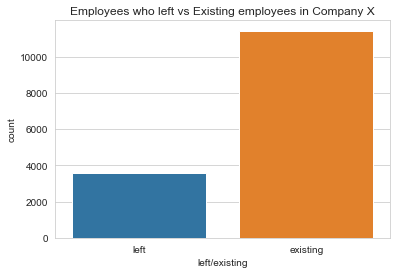

In [17]:
# plot the left/existing column in our 'employee_df' dataframe
sns.countplot('left/existing', data=employee_df)
plt.title('Employees who left vs Existing employees in Company X')

From the above plot, we see that the number of employees leaving the company is much less than the number of employees existing; more than half of the employees are still in the company.

For a precise intuition, we shall do a pie chart to compare the employees.

<AxesSubplot:title={'center':'Employees who left vs Existing employees in Company X'}, ylabel='left/existing'>

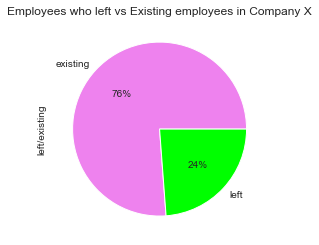

In [18]:
# do a pie chart for the 'left/existing' column
employee_df['left/existing'].value_counts().plot(kind='pie', autopct = '%1.0f%%', colors=['violet', 'lime'],
                                                 title='Employees who left vs Existing employees in Company X')

Now we get it clear that, **76%** of the employees in the company are still **existing** in the company and only **24%** have **left**. This is a good intuition to begin with.

So, let's investigate this 24% that are leaving and why they are leaving.

#### What is the salary distribution for the employees and how does it affect the stay of an employee in the company?
It's widely known and acknowledged, from our general knowledge and what we know, that salary is a very important thing of concern for each employee in any company. So how is salary distributed for employees in this company X that we are looking at?

Text(0.5, 1.0, 'salary distribution among employees in company X')

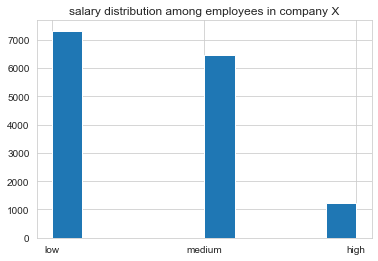

In [19]:
# do a histogram on the 'salary' column
employee_df['salary'].hist()
plt.title('salary distribution among employees in company X')

Most employees in the Company X are earning a low salary and very little are earning a high salary.

<AxesSubplot:title={'center':'salary distribution among employees in company X'}, ylabel='salary'>

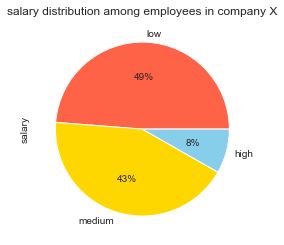

In [20]:
# do a pie chart on the 'salary' column
employee_df['salary'].value_counts().plot(kind='pie', autopct = '%1.0f%%', colors=['tomato','gold','skyblue'], 
                                          title='salary distribution among employees in company X')

From the above histogram, the largest number of employees in the company are earning low salary, another huge number (almost equal number) earn medium salary and very few people are earning high salaries. From the pie chart, **49%** of the total employees are earning **low** salaries, **43%** are earning **medium** salaries and only **8%** are earning **high** salaries.

C:\Users\BEN KOLE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Leaving vs Existing employees based on salary')

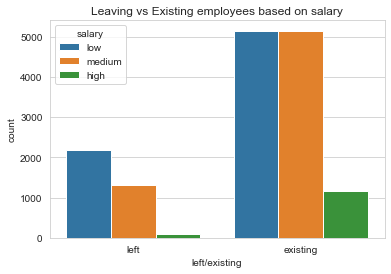

In [21]:
# how does salary affect stay of an employee
sns.countplot('left/existing', data=employee_df, hue='salary')
plt.title('Leaving vs Existing employees based on salary')

Employees who are earning low salaries have the higher tendencies of leaving the company followed by those earning medium salaries. However, it looks like those earning high salaries have much lower chances of leaving the company. It makes sense having low earning employees leaving the company, because if what someone earns cannot sustain them and family for example, then there are chances that one might leave the job.

### how does department affect the stay of an employee in the company?

<AxesSubplot:title={'center':'employee distribution among departments in company X'}, ylabel='dept'>

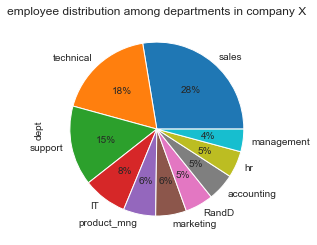

In [22]:
# do a pie chart on the 'dept' column
employee_df['dept'].value_counts().plot(kind='pie', autopct = '%1.0f%%', 
                                        title='employee distribution among departments in company X')

Sales department has the highest number of employees in the company whereas management department has the lowest.

C:\Users\BEN KOLE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Leaving vs Existing employees based on department')

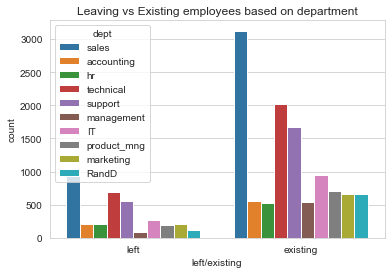

In [23]:
# how does department affect employee stay
sns.countplot('left/existing', data=employee_df, hue='dept')
plt.title('Leaving vs Existing employees based on department')

From the plot above, there is no clear intuition on how department affects the stay of an employee in the company. However, it looks like the more employees a department has, the more the number of employees it can lose. For example, the sales department which has the highest number of employees has also recorded the most number of employees that left. 

### how does number of projects affect the stay of an employee in the company?

C:\Users\BEN KOLE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Employee distribution based on number of projects')

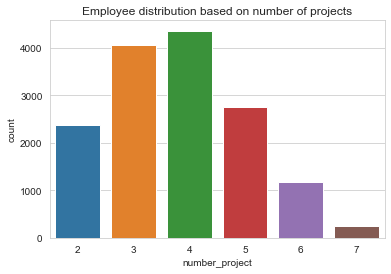

In [24]:
# do a countplot on the 'number_project' column in our 'employee_df' dataframe
sns.countplot('number_project', data=employee_df)
plt.title('Employee distribution based on number of projects')

Most employees in the company do between 3 and 5 projects. Very few do above 6.

C:\Users\BEN KOLE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Leaving vs Existing employees based on number of projects')

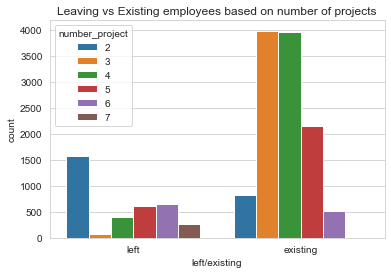

In [25]:
# how does number of projects affect employee stay
sns.countplot('left/existing', data=employee_df, hue='number_project')
plt.title('Leaving vs Existing employees based on number of projects')

### how does time spent affect the stay of an employee in the company?

C:\Users\BEN KOLE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'years spent by employees in company X')

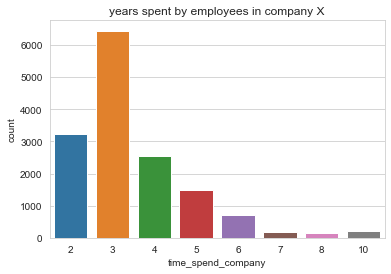

In [26]:
# do a count plot on the 'time_spend_company' column
sns.countplot('time_spend_company', data=employee_df)
plt.title('years spent by employees in company X')

<AxesSubplot:title={'center':'years spent by employees in company X'}, ylabel='time_spend_company'>

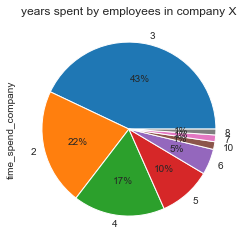

In [27]:
# pie chart
employee_df['time_spend_company'].value_counts().plot(kind='pie', autopct = '%1.0f%%', 
                                        title='years spent by employees in company X')

Most of the employees in the company have spent 3 years in the company (43%). Less than 10% have spent between 5 to 8 years.

C:\Users\BEN KOLE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Leaving vs Existing employees based on years spent')

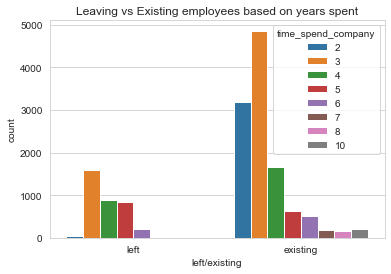

In [28]:
# how does time spent in the company affect employee stay
sns.countplot('left/existing', data=employee_df, hue='time_spend_company')
plt.title('Leaving vs Existing employees based on years spent')

Employees who have spent less than 2 years have lower chances of leaving the company. Those with 3 to 6 years in the company have higher chances of leaving the company. I feel that this makes sense because with less than 2 years in a company, one has not yet understood everything about the company; the general culture of the company, job satisfaction etc. However, as one continues being in the company, they will get to understand the company better and can now confidently decide whether it's good for them or not, depending on personal preferences.

Another interesting thing we see is that employees who have spent more than 7 years in the company do not leave the company at all. It might be interesting to investigate further on who these employees are? May be by doing that, you could find out that these are people who have fully adapted to everything in the company and are satisfied. May be some of them might have been there in the beginning since the company started, and so they understand the pros and cons of the company and are comfortable with all that. Therefore, they have very very low chances of leaving. However, all these depend on personal preferences from personal level.

### how does work accident affect stay of an employee

C:\Users\BEN KOLE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_accident', ylabel='count'>

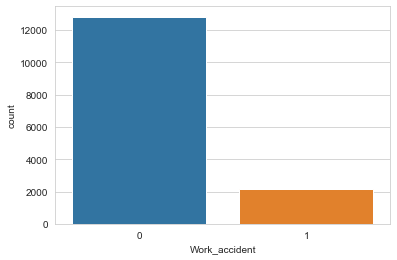

In [29]:
sns.countplot('Work_accident', data=employee_df)

C:\Users\BEN KOLE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='left/existing', ylabel='count'>

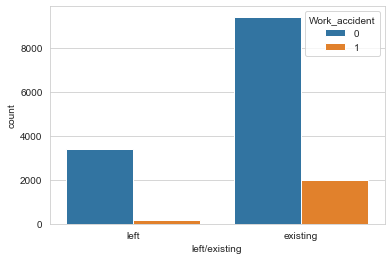

In [30]:
sns.countplot('left/existing', data=employee_df, hue='Work_accident')

Employees who have had accidents at work have lower chances of leaving the company, where are those who have had no accident have the highest chances of leaving the company.

### how does promotion affect employee stay

C:\Users\BEN KOLE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

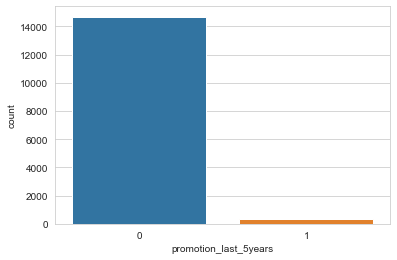

In [31]:
sns.countplot('promotion_last_5years', data=employee_df)

C:\Users\BEN KOLE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='left/existing', ylabel='count'>

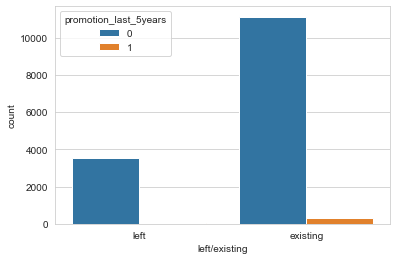

In [32]:
sns.countplot('left/existing', data=employee_df, hue='promotion_last_5years')

Employees who have had promotion in the last 5 years do not leave the company at all, whereas those who have had no promotion are leaving the company the most.

### satisfaction level distribution among employees in company X

Text(0.5, 1.0, 'satisfaction level of employees in company X')

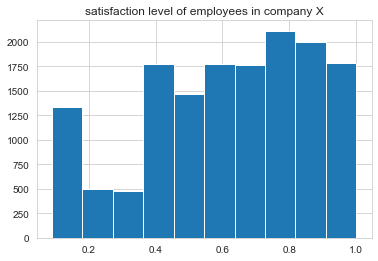

In [33]:
# create a histogram on the 'satisfaction_level' column
employee_df['satisfaction_level'].hist()
plt.title('satisfaction level of employees in company X')

### last evaluation distribution among employees in company X

<AxesSubplot:>

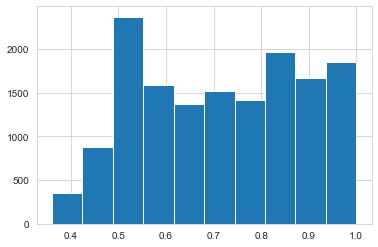

In [34]:
# create a histogram on the 'last_evaluation' column
employee_df['last_evaluation'].hist()

### average monthly hours

<AxesSubplot:>

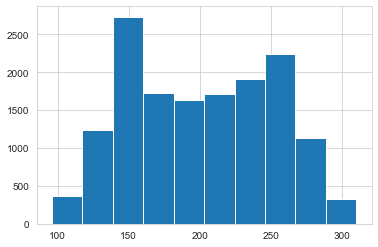

In [35]:
# create a histogram on the 'average monthly hours' column
employee_df['average_montly_hours'].hist()

In [36]:
employee_df['left/existing'] = employee_df['left/existing'].map({'left':0, 'existing':1})

In order to get a clear picture of how different attributes correlate with stay of an employee in a company, we shall do a heatmap of correlations among all the columns.

In [37]:
# first get correlations among the columns using .corr() method
employee_df.corr()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left/existing
Emp ID,1.000000,0.045841,-0.018168,-0.012124,-0.009850,0.144159,0.015931,0.088994,0.129047
satisfaction_level,0.045841,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.388375
last_evaluation,-0.018168,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,-0.006567
number_project,-0.012124,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,-0.023787
average_montly_hours,-0.009850,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.071287
time_spend_company,0.144159,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,-0.144822
Work_accident,0.015931,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.154622
promotion_last_5years,0.088994,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.061788
left/existing,0.129047,0.388375,-0.006567,-0.023787,-0.071287,-0.144822,0.154622,0.061788,1.000000


<AxesSubplot:>

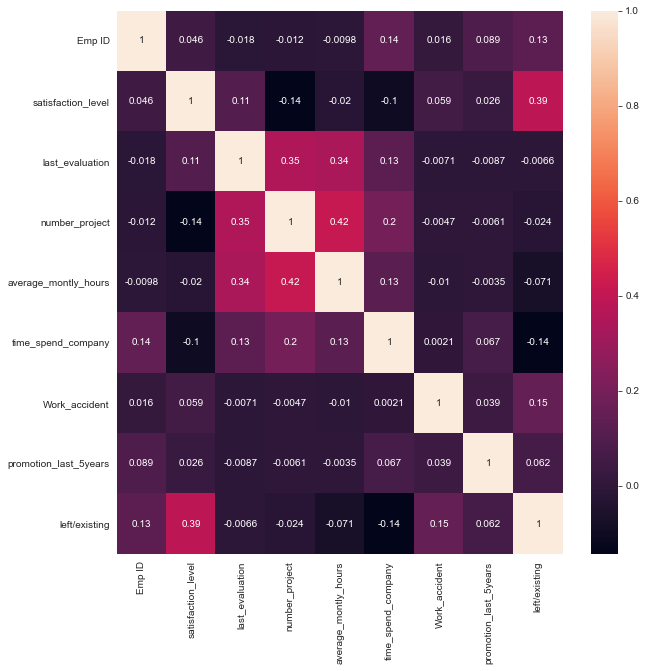

In [38]:
# create a heatmap of the correlations
plt.figure(figsize=(10,10))
sns.heatmap(employee_df.corr(), annot=True)

Looking at the correlations, the **satisfaction_level** attribute correlates highly with the **left/existing** column. With a correlation coefficient of 0.39, there is a direct correlation between satisfaction level and stay of employee in the company. Therefore whether an employee is going to stay in the company or not will be highly determined by their satisfaction level with the company.